In [75]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# **1. Random Upsample or Oversample:**

In [93]:
data = pd.read_csv('Churn_Modelling.csv', usecols=['CreditScore', 'Age', 'Exited'])
data.head(10)

,CreditScore,Age,Exited
0,619,42,1
1,608,41,0
2,502,42,1
3,699,39,0
4,850,43,0
5,645,44,1
6,822,50,0
7,376,29,1
8,501,44,0
9,684,27,0


In [94]:
data.shape

(10000, 3)

In [95]:
data.isnull().sum()

CreditScore    0
Age            0
Exited         0
dtype: int64

# **Check the dataset is balanced or imbalanced:**

In [97]:
data['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


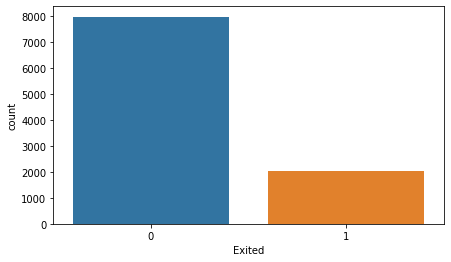

In [98]:
plt.figure(figsize=(7,4))
sns.countplot(data['Exited'])
plt.show()

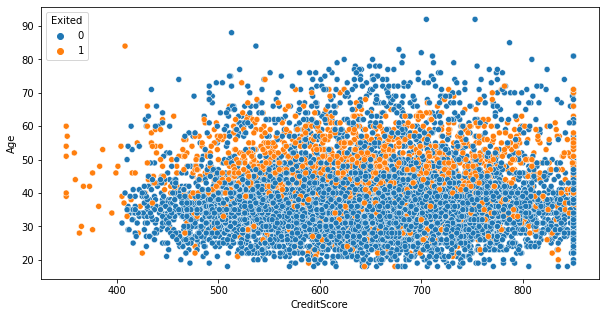

In [100]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data = data, x ='CreditScore', y = 'Age', hue = 'Exited')
plt.show()

In [101]:
def Upsample(data, col):
  from sklearn.utils import resample
  
  data_majority = data[(data[col] == 0)]
  data_minority = data[(data[col] == 1)]

  data_upSample_minority = resample(data_minority,
                                    replace = True,   # sample with replacement
                                    n_samples = 7963,  # to match majority class
                                    random_state = 42)
  
  random_oversample_data = pd.concat([data_upSample_minority, data_majority])
  return random_oversample_data

In [102]:
random_oversample_data = Upsample(data, 'Exited')
random_oversample_data.head(5)

,CreditScore,Age,Exited
5363,771,51,1
7088,556,54,1
4076,672,50,1
6255,547,55,1
5371,712,33,1


In [103]:
random_oversample_data.shape

(15926, 3)

In [105]:
random_oversample_data['Exited'].value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

In [106]:
random_oversample_data.isnull().sum()

CreditScore    0
Age            0
Exited         0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


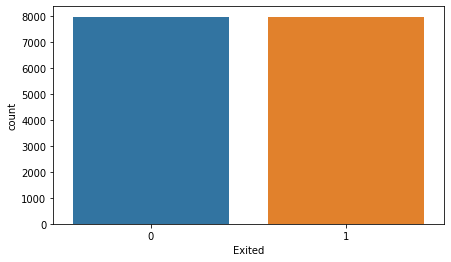

In [107]:
plt.figure(figsize=(7,4))
sns.countplot(random_oversample_data['Exited'])
plt.show()

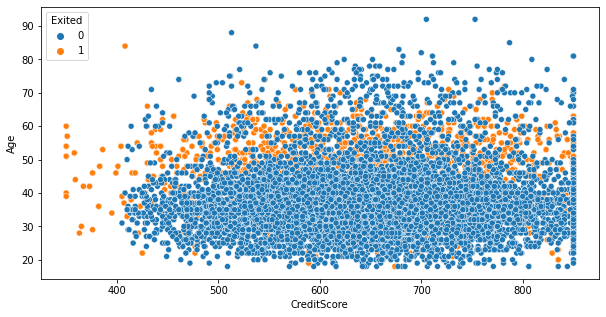

In [108]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data = random_oversample_data, x ='CreditScore', y = 'Age', hue = 'Exited')
plt.show()